In [28]:
import pandas
passengers = pandas.DataFrame.from_csv('Titanic.csv')
passengers.head()

,Name,PClass,Age,Sex,Survived,SexCode
1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
2,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
5,"Allison, Master Hudson Trevor",1st,0.92,male,1,0


In [29]:
print('We know about {} passengers.'.format(len(passengers)))

We know about 1313 passengers.


In [30]:
males = passengers[passengers['Sex'] == 'male']
females = passengers[passengers['Sex'] == 'female']

total_survived = len(passengers[passengers['Survived'] == 1])
males_survived = len(males[males['Survived'] == 1])
females_survived = len(females[females['Survived'] == 1])

print("{} passengers sruvived which is {:.2%} of total.".format(total_survived,  total_survived/len(passengers)))
print("{} males sruvived which is {:.2%} of males".format(males_survived,  males_survived/len(males)))
print("{} females sruvived which is {:.2%} of females".format(females_survived,  females_survived/len(females)))

450 passengers sruvived which is 34.27% of total.
142 males sruvived which is 16.69% of males
308 females sruvived which is 66.67% of females


In [31]:
classes = passengers['PClass'].unique()
for c in  classes:
    class_passengers = passengers[passengers['PClass'] == c]
    class_survived = len(class_passengers[class_passengers['Survived'] == 1])
    print('{} passengers of class {} boarded the Titanic, {} survived which is {:.2%}'
         .format(len(class_passengers), c, class_survived, class_survived/len(class_passengers)))

322 passengers of class 1st boarded the Titanic, 193 survived which is 59.94%
279 passengers of class 2nd boarded the Titanic, 119 survived which is 42.65%
1 passengers of class * boarded the Titanic, 0 survived which is 0.00%
711 passengers of class 3rd boarded the Titanic, 138 survived which is 19.41%


In [32]:
byDecade = passengers
byDecade["Age"] = byDecade["Age"] // 10
cnt = byDecade.groupby("Age").count()
grouped = byDecade.groupby("Age").sum()
grouped["Count"] = cnt["Survived"]
grouped

,Survived,SexCode,Count
Age,,,
0.0,37,25,53
1.0,44,51,96
2.0,84,81,252
3.0,70,61,168
4.0,43,37,106
5.0,26,24,54
6.0,9,9,23
7.0,0,0,4


In [33]:
import matplotlib
import matplotlib.style
matplotlib.style.use('ggplot')

# Zapnout zobrazování grafů (procento uvozuje „magickou” zkratku IPythonu):
%matplotlib inline

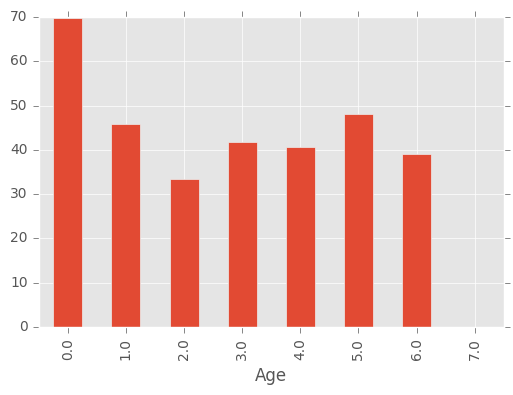

In [34]:
(grouped["Survived"]/grouped["Count"]*100).plot.bar()

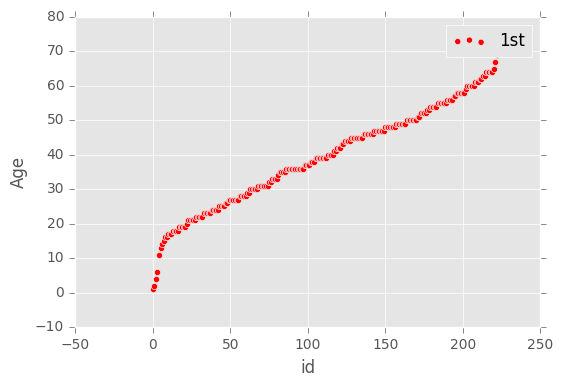

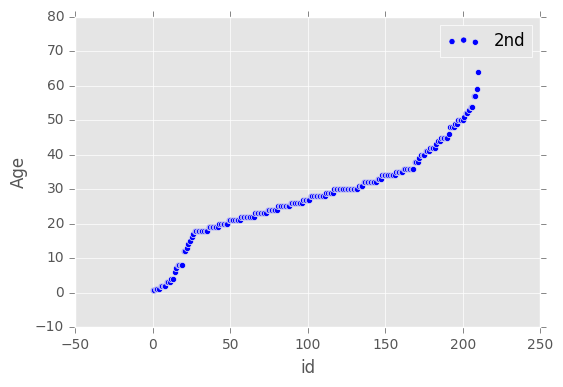

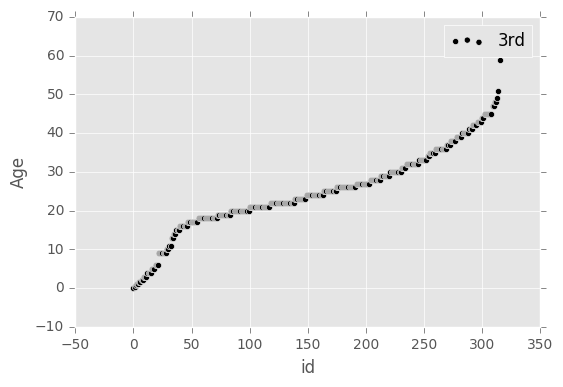

In [35]:
passengers = pandas.DataFrame.from_csv('Titanic.csv')
corel = passengers[["Age", "PClass"]]
# corel = corel["PClass"].apply({"1st": 1, "2nd": 2, "3rd": 3, "*": None}.get)
corel = corel.sort_values("Age")
corel = corel.reset_index(drop=True)
corel = corel.dropna()
corel["id"] = corel.index
groups = corel.groupby("PClass")
colors = {"1st": "red", "2nd":"blue", "3rd": "black"}
for key, group in groups:
    grp = group.reset_index(drop=True)
#     print(grp)
    grp['id'] = grp.index
    grp.plot(kind="scatter", x="id", y="Age", label=key, color=colors[key])

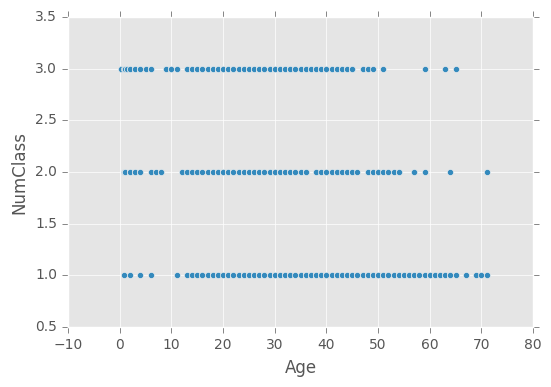

In [36]:
num_class = corel["PClass"].apply({"1st": 1, "2nd": 2, "3rd": 3, "*": None}.get)
corel["NumClass"] = num_class
corel.plot.scatter(x="Age", y="NumClass")

Now for the last question i was not sure how to go about this. So I made a graph that shows age of each passenger in his respective class. Those are first three graphs and it seems to me they are more or less same. Now the fourth graph is scatter plot of Age and Class. Now if class had not been discrete, the points would be all over in square like pattern, which would signify no corelation. So based on these four graphs I'd say there is no corelation between age and passenger class.